# test SNA
测试案例：正在进行中
## 说明
社交网络分析SNA：中文NLP+网络分析
目前主要是基于harvesttext和HanLP进行中文NLP，基于nnetworkx进行网络分析  
目前分析对象为三国演义，由于文言文与现代白话文

In [2]:
import sys
print(sys.executable)

C:\Users\test\.conda\envs\DataAnalysis\python.exe


In [77]:
def ptype(in_data):
    print(type(in_data))

## case: 三国演义SNA
### 1. 获取语料
为了简便，直接从harvesttext导入现成的三国演义文本。

In [72]:
import harvesttext
help(harvesttext)

Help on package harvesttext:

NAME
    harvesttext

DESCRIPTION
    #coding=utf-8
    #!/usr/bin/env python

PACKAGE CONTENTS
    entity_discoverer
    harvesttext
    match_patterns
    resources
    sent_dict
    texttile
    utils
    word_discoverer

FUNCTIONS
    loadHT(filename)
    
    saveHT(htModel, filename)

FILE
    c:\users\test\.conda\envs\dataanalysis\lib\site-packages\harvesttext\__init__.py




In [73]:
import harvesttext.resources as ht_resources
help(harvesttext.resources)

Help on module harvesttext.resources in harvesttext:

NAME
    harvesttext.resources

DESCRIPTION
    #coding=utf-8
    #!/usr/bin/env python

FUNCTIONS
    get_baidu_stopwords()
        获得百度停用词列表
        来源，网上流传的版本：https://wenku.baidu.com/view/98c46383e53a580216fcfed9.html
        包含了中英文常见词及部分标点符号
        :return: stopwords: set of string
    
    get_english_senti_lexicon(type='LH')
        获得英语情感词汇表
        
        目前默认为来自这里的词汇表
        https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
        
        If you use this list, please cite the following paper:
        
           Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."
               Proceedings of the ACM SIGKDD International Conference on Knowledge
               Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,
               Washington, USA,
        
        :return: sent_dict = {"pos":[words],"neg":[words]}
    
    get_qh_sent_dict()
        获得参考褒贬义词典：
        褒贬义词典   清华大学 

In [74]:
chapters = ht_resources.get_sanguo()                 # 文本列表，每个元素为一章的文本
print(len(chapters[0]))
print(chapters[0][:106])

4784
第一回 宴桃园豪杰三结义　斩黄巾英雄首立功

  
	滚滚长江东逝水，浪花淘尽英雄。是非成败转头空。

	青山依旧在，几度夕阳红。

	白发渔樵江渚上，惯看秋月春风。一壶浊酒喜相逢。

	古今多少事，都付笑谈中。


从文本文件读取文本

In [5]:
processed_texts = []
with open("all_comments.txt", encoding="utf-8") as f:
    for line in f:
        if len(line) > 0:
            processed_texts.append(line)
print("\n".join(processed_texts[:10]))

特神牛逼

请教下，叶尔凡去了哪里？也不见替补哇

下场上！

11号请在东看台26区找我不见不散！//<a href="https://home.zhibo8.cc/user.html?platform=mobile&uid=3348048">@江苏苏宁俱乐部</a>：下场上！

这场看了20分钟就走了。还好是免费的！[笑哭]

心疼我的筱婷

卡佩罗牛逼，敢上三个U23球员！为你****🐮

恭喜特谢拉加入“我奶奶都能进”系列[滑稽][捂脸]

视频裁判这么好用居然还有人喷，减少很多争议。耗时间只是刚开始不够专业需要时间来优化。

就算耗时间得到公正判罚也值得了。



## 2. 语料预处理
### 2.1 语料清洗
harvesttext的文本清洗方法仅适用于微博文本

In [18]:
from harvesttext import HarvestText

In [7]:
ht = HarvestText()
help(ht.clean_text) #仅适用于微博文本

Help on method clean_text in module harvesttext.harvesttext:

clean_text(text, remove_url=True, email=True, weibo_at=True, stop_terms=('转发微博',), emoji=True, weibo_topic=False, deduplicate_space=True, norm_url=False, norm_html=False, to_url=False, remove_puncts=False, remove_tags=True, t2s=False) method of harvesttext.harvesttext.HarvestText instance
    进行各种文本清洗操作，微博中的特殊格式，网址，email，html代码，等等
    
    :param text: 输入文本
    :param remove_url: （默认使用）是否去除网址
    :param email: （默认使用）是否去除email
    :param weibo_at: （默认使用）是否去除微博的\@相关文本
    :param stop_terms: 去除文本中的一些特定词语，默认参数为("转发微博",)
    :param emoji: （默认使用）去除\[\]包围的文本，一般是表情符号
    :param weibo_topic: （默认不使用）去除##包围的文本，一般是微博话题
    :param deduplicate_space: （默认使用）合并文本中间的多个空格为一个
    :param norm_url: （默认不使用）还原URL中的特殊字符为普通格式，如(%20转为空格)
    :param norm_html: （默认不使用）还原HTML中的特殊字符为普通格式，如(\&nbsp;转为空格)
    :param to_url: （默认不使用）将普通格式的字符转为还原URL中的特殊字符，用于请求，如(空格转为%20)
    :param remove_puncts: （默认不使用）移除所有标点符号
    :param remove_tags: （默认使用）移除所有html块
    :par

去空格与空行  

In [58]:
ch1_text=chapters[0]
# print(ch1_text[12])
print(type(ch1_text))
ch1_text=ch1_text.replace('\n','')
ch1_text=ch1_text.replace('\t','')
ch1_text=ch1_text.replace('\r','')
ch1_text=ch1_text.replace('\000','')
ch1_text=ch1_text.replace(" ","")
print(ch1_text[:200])

<class 'str'>
第一回宴桃园豪杰三结义　斩黄巾英雄首立功滚滚长江东逝水，浪花淘尽英雄。是非成败转头空。青山依旧在，几度夕阳红。白发渔樵江渚上，惯看秋月春风。一壶浊酒喜相逢。古今多少事，都付笑谈中。——调寄《临江仙》话说天下大势，分久必合，合久必分。周末七国分争，并入于秦。及秦灭之后，楚、汉分争，又并入于汉。汉朝自高祖斩白蛇而起义，一统天下，后来光武中兴，传至献帝，遂分为三国。推其致乱之由，殆始于桓、灵二帝。桓帝禁


### 2.2 分句

In [142]:
ch1_sentence_list=ht.cut_sentences(ch1_text)
print(ch1_sentence_list[:10])

['第一回宴桃园豪杰三结义\u3000斩黄巾英雄首立功滚滚长江东逝水，浪花淘尽英雄。', '是非成败转头空。', '青山依旧在，几度夕阳红。', '白发渔樵江渚上，惯看秋月春风。', '一壶浊酒喜相逢。', '古今多少事，都付笑谈中。', '——调寄《临江仙》话说天下大势，分久必合，合久必分。', '周末七国分争，并入于秦。', '及秦灭之后，楚、汉分争，又并入于汉。', '汉朝自高祖斩白蛇而起义，一统天下，后来光武中兴，传至献帝，遂分为三国。']


### 2.3 HanLP处理

自定义词典  
结合https://blog.csdn.net/FontThrone/article/details/82793887 和 https://blog.csdn.net/ouening/article/details/102652087 。  
永久修改：修改自定义词典文件，删除path_custom_dict下的bin文件，重新运行程序  

In [ ]:
path_hanlp="C:\\Users\\test\\.conda\\envs\\DataAnalysis\\Lib\\site-packages\\"
path_custom_dict=path_hanlp+"pyhanlp\\static\\data\\dictionary\\custom\\"
filename="PCdict.txt"

In [67]:
from pyhanlp import *

提取关键词和摘要

In [57]:
print(HanLP.extractKeyword(ch1_text,10)) #第二个参数：关键词个数
print(HanLP.extractSummary(ch1_text,3)) #第二个参数：关键词个数

[玄德, 曰, 中, 见, 贼, 张角, 刘, 引, 遂, 兵]
[玄德曰, 因见玄德家贫, 刘焉令邹靖引玄德等三人]


In [65]:
sentence=ch1_sentence_list[30]
print(sentence)
print(HanLP.parseDependency(sentence))

朝政日非，以致天下人心思乱，盗贼蜂起。
1	朝政日	朝政日	j	j	_	2	定中关系	_	_
2	非	非	j	j	_	0	核心关系	_	_
3	，	，	wp	w	_	2	标点符号	_	_
4	以致	以致	c	c	_	6	状中结构	_	_
5	天下人	天下人	n	n	_	6	定中关系	_	_
6	心思乱	心思乱	n	n	_	2	并列关系	_	_
7	，	，	wp	w	_	6	标点符号	_	_
8	盗贼	盗贼	n	n	_	9	主谓关系	_	_
9	蜂起	蜂起	v	v	_	6	并列关系	_	_
10	。	。	wp	w	_	2	标点符号	_	_



## 3. 实体识别与别名挖掘
### 3.1 HarvestText
#### 实体识别
先尝试HarvestText的"NFL"算法(NER+FastText+Louvain)  

In [9]:
help(ht.entity_discover)

Help on method entity_discover in module harvesttext.harvesttext:

entity_discover(text, return_count=False, method='NFL', min_count=5, pinyin_tolerance=0, **kwargs) method of harvesttext.harvesttext.HarvestText instance
    无监督地从较大量文本中发现实体的类别和多个同义mention。建议对千句以上的文本来挖掘，并且文本的主题比较集中。
        效率：在测试环境下处理一个约10000句的时间大约是20秒。另一个约200000句的语料耗时2分半
        精度：算法准确率不高，但是可以初步聚类，建议先save_entities后, 再进行手动进行调整，然后load_entities再用于进一步挖掘
    
        ref paper: Mining Entity Synonyms with Efficient Neural Set Generation(https://arxiv.org/abs/1811.07032v1)
    
    :param text: string or list of string
    :param return_count: (default False) 是否再返回每个mention的出现次数
    :param method: 使用的算法， 目前可选 "NFL" (NER+Fasttext+Louvain+模式修复，基于语义和规则发现同义实体，但可能聚集过多错误实体), "NERP"(NER+模式修复, 仅基于规则发现同义实体)
    :param min_count: (default 5) mininum freq of word to be included
    :param pinyin_tolerance: {None, 0, 1} 合并拼音相同(取0时)或者差别只有一个(取1时)的候选词到同一组实体，默认使用(0)
    :param kwargs: 根据算法决定的参数，目前, "NERP"不需要额外参数，而"NFL"可接受的额外参数有：
    
    

In [46]:
%%time
entity_mention_dict, entity_type_dict = ht.entity_discover(ch1_text, method="NFL", pinyin_tolerance=None, threshold=0.2)
# min_conut=5将导致Louvain报错，应该是传参错误
all_mentions = set(x for enty, ments in entity_mention_dict.items() for x in ments)
print(f"Num entities: {len(entity_mention_dict)}, Num mentions: {len(all_mentions)}")
print(entity_mention_dict)
print(entity_type_dict)

100%|██████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 1768.15it/s]

Doing NER
Training fasttext


Louvain clustering
Num entities: 3, Num mentions: 11
defaultdict(<class 'set'>, {'张角_人名': {'张梁', '董卓', '张角', '卢植', '张宝', '贼众', '张飞', '程远志'}, '刘_其他专名': {'黄巾', '刘'}, '颍川_地名': {'颍川'}})
{'张角_人名': '人名', '刘_其他专名': '其他专名', '颍川_地名': '地名'}
Wall time: 3.74 s


HarvestText的"NFL"算法效果很差。调整threshold没有显示区别。  
然后尝试HarvestText的"NERP"算法

In [127]:
%%time
entity_mention_dict, entity_type_dict = ht.entity_discover(ch1_text, method="NERP", pinyin_tolerance=None)
# min_conut=5将导致Louvain报错，应该是传参错误
all_mentions = set(x for enty, ments in entity_mention_dict.items() for x in ments)
print(f"Num entities: {len(entity_mention_dict)}, Num mentions: {len(all_mentions)}")
print(entity_mention_dict)
print(entity_type_dict)

 26%|████████████████████▋                                                           | 58/224 [00:00<00:00, 575.80it/s]

Doing NER


100%|██████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 1123.00it/s]

Num entities: 4, Num mentions: 4
defaultdict(<class 'set'>, {'黄巾_其他专名': {'黄巾'}, '#人名#_人名': {'#人名#'}, '贼众_人名': {'贼众'}, '颍川_地名': {'颍川'}})
{'黄巾_其他专名': '其他专名', '#人名#_人名': '人名', '贼众_人名': '人名', '颍川_地名': '地名'}
Wall time: 207 ms


HarvestText的"NERP"算法效果也很差。基本和"NFL"一样。     
识别后，存储为文本文件，然后人工调整。

In [128]:
ht.save_entity_info('./entity_info_v1.txt', entity_mention_dict, entity_type_dict)
print("\n".join(open("./entity_info_v1.txt", encoding="utf-8").readlines(100)))

黄巾_其他专名||其他专名 黄巾||其他专名

#人名#_人名||人名 #人名#||人名

贼众_人名||人名 贼众||人名

颍川_地名||地名 颍川||地名


载入人工调整后的文件

In [131]:
print("\n".join(open("./entity_info_v1.txt", encoding="utf-8").readlines(100)))
ht.load_entities("./entity_info_v1.txt")

黄巾_其他专名||其他专名 黄巾||其他专名

#人名#_人名||人名 #人名#||人名

贼众_人名||人名 贼众||人名

颍川_地名||地名 颍川||地名


#### 实体联系
直接将别名替换为原名

In [145]:
entity_mention_dict, entity_type_dict = ht_resources.get_sanguo_entity_dict()
ht = HarvestText()
# ht.save_entity_info('./entity_info_v1.txt', entity_mention_dict, entity_type_dict)
# print("\n".join(open("./entity_info_v1.txt", encoding="utf-8").readlines(100)))
# ht.load_entities("./entity_info_v1.txt")
ht.add_entities(entity_mention_dict, entity_type_dict) # 加载模型给ht
print(ht.seg("誓毕，拜玄德为兄，关羽次之，张飞为弟。",standard_name=True))

['誓毕', '，', '拜', '刘备', '为兄', '，', '关羽', '次之', '，', '张飞', '为弟', '。']


### 3.2 HanLP ht_resources.效果好
尝试HanLP的实体识别算法，主要参考 https://blog.csdn.net/FontThrone/article/details/82792377 \

In [48]:
def ERP_h(term_list):
    name_list=[]
    for term in term_list:
        term_nature=str(term.nature)
        if term_nature=='nr1' or term_nature=='nr2' or term_nature=='nrf': #非典型人名
            print('{}\t{}'.format(term.word, term.nature)) #word为分出的词，nature为词性
        if term_nature=='nr': #典型人名
            name_list.append(term.word)
    name_list=list(set(name_list))
    print(len(name_list))
    print(name_list)

#### CRF条件随机场
据称，CRF分词、词性标注与命名实体识别精度都较高，适合要求较高的NLP任务。  
使用封装好的HanLP.newSegment()来使用基础分词器。

In [49]:
PTokenizer = HanLP.newSegment("crf")
term_list = PTokenizer.seg(ch1_text)
print(type(term_list)) #非内置Python类型
# print(term_list)
ERP_h(term_list)

<class 'jpype._jclass.java.util.ArrayList'>
温德	nrf
大将	nrf
109
['梁上飞', '安民', '曹名', '蔡邕', '苏双', '龚景犒', '次之', '黄巾贼', '玄德祖', '刘贞', '张梁', '孟德', '朱儁', '窦武', '刘雄', '邓茂心', '白土', '张名飞', '邹靖', '夏侯氏', '邓茂', '陈蕃谋诛之', '张纵马上', '段珪', '张飞挺丈', '关', '黄天', '徐', '马元义', '刘焉大喜', '张宝败', '张角', '阿瞒', '建宁', '邹靖引', '蹇硕', '曹嵩生操', '马不及鞍', '刘', '关公', '张飞引', '尝怒之', '许劭', '张飞大怒曰', '汉武', '童颜', '邹靖引军', '秦灭', '张宝', '刘备', '张世平', '张角本', '夏恽', '陈蕃共', '张天', '邹靖引见', '张宝势', '龚景牒文', '张飞', '刘焉然', '张宝死', '摩军', '张飞造丈', '张来颍川', '曹操', '郑玄', '马匹', '卢植大喜', '程远志', '刘名备', '童童', '卢中郎', '南阳', '张引本部', '刘焉发榜', '曹嵩', '赵忠', '刘焉', '张曰', '卢植', '招募乡勇', '汝南', '关羽', '刘胜之子', '张', '刘焉令', '张角闻', '刘元起', '邹靖将兵', '唐周', '张让', '程旷', '刘焉亲自', '邹靖欲回', '曹', '拜玄德', '曹节', '高五丈余', '董卓', '施礼', '黎庶', '白发', '刘胜', '高冈', '何顒见操', '侯览', '汝得之', '朱儁领', '今民']


HanLP是分词+词性标注+实体识别，词性标注集见https://www.hankcs.com/nlp/part-of-speech-tagging.html#h2-8 。  
CRF人名识别质量还行
#### 感知机
NLP分词NLPTokenizer由结构化感知机序列标注框架支撑，基于大型综合中文语料库训练。  
使用JClass调用java对象。

In [41]:
JTokenizer = JClass("com.hankcs.hanlp.tokenizer.NLPTokenizer")
term_list = JTokenizer.segment(ch1_text)
print(type(term_list))
# print(term_list)
ERP_h(term_list)

<class 'jpype._jclass.java.util.ArrayList'>
大将 nrf
温德 nrf
温德 nrf
大将 nrf
皆宜 nrf
顿丘 nrf
91
['普', '小方', '梁上飞', '曹名', '蔡邕', '张梁', '孟德', '朱儁', '邹靖计议', '窦武', '白土', '金帛', '冈望之', '邹靖', '张宝去', '陈蕃', '邓茂', '子刘贞', '张引', '方可', '段珪', '申言于众', '关', '徐', '刘焉大喜', '。帝', '何进', '张角', '于桃', '阿瞒', '刘焉然其说', '蹇硕', '刘', '关公', '刘元', '皇甫嵩', '许劭', '嵩', '甚喜', '张宝', '龚景牒', '刘备', '张世平', '劭', '郭胜', '夏恽', '张飞', '张宝死', '摩军', '何顒', '曹操', '郑玄', '程远志', '桓', '童童', '刘焉发榜', '曹嵩', '赵忠', '桓帝', '刘焉', '卢植', '唇若', '龚景', '关羽', '张', '刘焉令', '备昔', '唐周', '程旷', '汝', '曹', '公孙瓒', '冷艳', '帝御', '晓夜', '已顺', '曹节', '董卓', '翼德', '施礼', '黎庶', '祖刘雄', '张纵马', '马不及', '陈蕃谋', '张来', '侯览', '儁', '刘弘。弘', '黄天当立', '吾']


NLP效果比CRF差

In [40]:
term_list=NLPTokenizer.analyze(ch1_text)
print(type(term_list))
# print(term_list)
# print(term_list.translateLabels())

<class 'jpype._jclass.com.hankcs.hanlp.corpus.document.sentence.Sentence'>


#### N最短路
命名实体识别较好？

In [45]:
PTokenizer = HanLP.newSegment("nshort")
term_list = PTokenizer.seg(ch1_text)
print(type(term_list)) #非内置Python类型
# print(term_list)
ERP_h(term_list)

<class 'jpype._jclass.java.util.ArrayList'>
温德 nrf
皆宜 nrf
顿丘 nrf
182
['时张角', '遣副将', '梁上飞', '操闻言', '官拜骑', '苏双', '贼弟', '张飞造', '言黄巾', '玄德祖', '刘贞', '张角散', '桥玄', '张梁', '孟德', '窦武', '回奏', '操有', '温德殿', '于众曰', '靖曰', '刘雄', '白土', '玄德兵', '张名飞', '于县之', '方过', '方升座', '邹靖', '夏侯氏', '陈蕃', '乌牛', '邓茂', '张引', '汉鲁恭', '张飞为', '代将', '应曰', '段珪', '操曰', '白身', '马元义', '何进', '申言', '于园', '张角', '龚景亦', '车中之', '邹靖引', '弘曾', '运将', '蹇硕', '封谞', '张宝引', '呼为', '黄巾盖', '张飞引', '刘元', '皇甫嵩', '师事郑', '植谓玄', '念刘备', '阿父', '乐太平', '许劭', '黄天当', '愈横', '于玉堂', '玄德摩', '张宝', '遇一', '曾师', '张世平', '郭胜', '夏恽', '江夏竟', '令邹靖', '山后', '云长造', '张宝势', '席为业', '玄德遂', '植兵', '于秦', '实鉴', '张飞', '植曰', '楼桑村', '那张角', '曹腾', '张来颍', '余钱', '张飞挺', '高五', '袭张梁', '曹操', '拜而', '汝可引', '程远志', '白发渔', '曹名操', '于是邹', '何职', '刘名备', '童童', '卢中郎', '于汉', '于地', '江渚', '回宴', '曹嵩', '卓问', '安黎庶', '赵忠', '桓帝', '常资', '张曰', '左有云', '卢植', '露颖', '安之者', '角军', '操父', '龚景', '关羽', '贼寨', '言曰', '关名羽', '言于', '贼众', '靖引军', '拜为骑', '都付', '张飞庄', '唐周', '张让', '车盖', '程旷', '汉分争', '言操', '云长', '金为号', '公孙瓒', '邹靖欲', '冒姓

1. 文言文和现代白话文的分词和实体识别有一定区别；  
2. N最短路的实体识别较为全面，可以考虑作为人工识别的基础参考。  

#### 结合自定义词典
参考https://blog.csdn.net/FontThrone/article/details/82793887 。  
动态增加词典条目，单词 词性+词频。

In [90]:
entity_mention_dict, entity_type_dict = ht_resources.get_sanguo_entity_dict() #获得背景知识库
n=0
for i in  entity_mention_dict.items():
    n=n+1
    if n<10:print(i)
n=0
for i in  entity_type_dict.items():
    n=n+1
    if n<10:print(i)
# print(entity_mention_dict)
# print(entity_type_dict)
print("刘备的别名有：",entity_mention_dict["刘备"])
print("刘延[魏]的别名有：",entity_mention_dict["刘延[魏]"])
print("刘延[魏]的类型为",entity_type_dict["刘延[魏]"])
ptype(entity_mention_dict["刘备"])
ptype(entity_type_dict["刘延[魏]"])

('汉', ['东汉', '汉室'])
('蜀', ['蜀', '蜀汉'])
('吴', ['吴', '东吴', '孙吴'])
('魏', ['魏', '曹魏'])
('晋', ['晋', '西晋'])
('豫州', ['豫州'])
('扬州', ['扬州'])
('荆州', ['荆州'])
('司隶', ['司隶'])
('汉', '势力')
('蜀', '势力')
('吴', '势力')
('魏', '势力')
('晋', '势力')
('豫州', '州名')
('扬州', '州名')
('荆州', '州名')
('司隶', '州名')
刘备的别名有： ['刘备', '刘玄德', '玄德', '使君']
刘延[魏]的别名有： ['刘延']
刘延[魏]的类型为 人名
<class 'list'>
<class 'str'>


In [113]:
CustomDictionary = JClass("com.hankcs.hanlp.dictionary.CustomDictionary")
for i in entity_type_dict:
    try:
        if entity_type_dict[i]=="人名":
            nr_list=entity_mention_dict[i]
            nr_list.append(i)
            for name in nr_list:CustomDictionary.add(name,"nr 1024")
        elif entity_type_dict[i]=="州名":
            ns_list=entity_mention_dict[i]
            ns_list.append(i)
            for name in ns_list:CustomDictionary.add(name,"ns 1024")
        elif entity_type_dict[i]=="势力":
            nt_list=entity_mention_dict[i]
            nt_list.append(i)
            for name in nt_list:CustomDictionary.add(name,"nt 1024")
    except KeyError:
#         print("entity_mention_dict中缺少entity_type_dict中存在的键",i)
        i
print(CustomDictionary.get("玄德"))
# CustomDictionary.add("单身狗", "nz 1024 n 1")  # 动态增加
# CustomDictionary.insert("白富美", "nz 1024")  # 强行插入
#CustomDictionary.remove("单身狗"); # 删除词语（注释掉试试）

n 956 


In [110]:
PTokenizer = HanLP.newSegment("crf")
term_list = PTokenizer.seg(ch1_text)
print(type(term_list)) #非内置Python类型
# print(term_list)
ERP_h(term_list)

<class 'jpype._jclass.java.util.ArrayList'>
温德	nrf
大将	nrf
121
['梁上飞', '安民', '曹名', '蔡邕', '苏双', '龚景犒', '次之', '黄巾贼', '玄德祖', '刘贞', '张梁', '孟德', '朱儁', '窦武', '刘雄', '邓茂心', '白土', '张名飞', '邹靖', '夏侯氏', '邓茂', '陈蕃谋诛之', '张纵马上', '段珪', '张飞挺丈', '关', '黄天', '徐', '马元义', '刘焉大喜', '何进', '张宝败', '张角', '阿瞒', '建宁', '邹靖引', '蹇硕', '曹嵩生操', '封谞', '马不及鞍', '刘', '关公', '张飞引', '皇甫嵩', '尝怒之', '公孙', '许劭', '张飞大怒曰', '汉武', '童颜', '邹靖引军', '秦灭', '张宝', '刘备', '张世平', '张角本', '夏恽', '陈蕃共', '张天', '邹靖引见', '张宝势', '龚景牒文', '张飞', '刘焉然', '文行', '张宝死', '望之', '曹腾', '摩军', '张飞造丈', '张来颍川', '曹操', '郑玄', '马匹', '卢植大喜', '程远志', '南华老仙', '刘名备', '童童', '卢中郎', '南阳', '张引本部', '刘焉发榜', '贵人', '曹嵩', '赵忠', '刘焉', '张曰', '卢植', '招募乡勇', '汝南', '关羽', '刘胜之子', '张', '刘焉令', '张角闻', '刘元起', '邹靖将兵', '唐周', '远志', '张让', '程旷', '刘焉亲自', '邹靖欲回', '云长', '曹', '左丰', '拜玄德', '曹节', '高五丈余', '董卓', '施礼', '黎庶', '白发', '刘胜', '高冈', '何顒见操', '侯览', '汝得之', '朱儁领', '今民']


In [124]:
PTokenizer = HanLP.newSegment("crf")
PTokenizer.enableCustomDictionaryForcing(True)
term_list = PTokenizer.seg(ch1_text)
print(type(term_list)) #非内置Python类型
# print(term_list)
ERP_h(term_list)

<class 'jpype._jclass.java.util.ArrayList'>
大将	nrf
温德	nrf
温德	nrf
大将	nrf
皆宜	nrf
顿丘	nrf
93
['梁上飞', '安民', '曹名', '蔡邕', '苏双', '次之', '刘贞', '桥玄', '张梁', '孟德', '朱儁', '窦武', '刘雄', '白土', '邹靖', '陈蕃', '邓茂', '张引', '段珪', '关', '黄天', '徐', '马元义', '何进', '张角', '于桃', '阿瞒', '建宁', '蹇硕', '封谞', '马不及鞍', '刘', '关公', '皇甫嵩', '尝怒之', '许劭', '童颜', '秦灭', '张宝', '刘备', '张世平', '郭胜', '夏恽', '议郎', '周末七', '张天', '张飞', '望之', '文行', '曹腾', '摩军', '曹操', '郑玄', '马匹', '程远志', '南华老仙', '刘名备', '童童', '南阳', '贵人', '曹嵩', '赵忠', '刘焉', '张曰', '卢植', '龚景', '汝南', '关羽', '张', '刘元起', '唐周', '张让', '程旷', '云长', '曹', '公孙瓒', '左丰', '刘弘', '曹节', '董卓', '施礼', '黎庶', '白发', '鲁恭王', '张纵马', '刘胜', '何顒见操', '张来', '侯览', '谋诛之', '汝得之', '刺中', '今民']


In [125]:
# JAnalyzer = JClass("com.hankcs.hanlp.model.crf.CRFLexicalAnalyzer")
# analyzer = JAnalyzer()
# analyzer.enableCustomDictionaryForcing(True)
# term_list = analyzer.analyze(ch1_text)
# print(type(term_list)) #非内置Python类型
# print(term_list)
# # ERP_h(term_list)

效果会要好许多

### 3.3 综合
考虑使用背景知识确定角色列表，并作为词典；然后综合HanLP的N最短路和CRF来发现新词，辅以人工处理，确定角色别名，更新词典；最后，使用HarvestText来处理实体链接

## 4. 简单文本分析
### 4.1 检测实体出现
### 4.2 角色分析
#### 角色出现频次

In [ ]:
#实体识别.ipynb
inv_index = ht.build_index(processed_texts)
print(ht.get_entity_counts(processed_texts, inv_index))

## 5. 构建网络

使用HarvestText提供的函数，检测实体出现与构建网络  
准备工作

In [146]:
# 检测ht实体模型
n=0
for i in  entity_mention_dict.items():
    n=n+1
    if n<10:print(i)
n=0
for i in  entity_type_dict.items():
    n=n+1
    if n<10:print(i)

('汉', ['东汉', '汉室'])
('蜀', ['蜀', '蜀汉'])
('吴', ['吴', '东吴', '孙吴'])
('魏', ['魏', '曹魏'])
('晋', ['晋', '西晋'])
('豫州', ['豫州'])
('扬州', ['扬州'])
('荆州', ['荆州'])
('司隶', ['司隶'])
('汉', '势力')
('蜀', '势力')
('吴', '势力')
('魏', '势力')
('晋', '势力')
('豫州', '州名')
('扬州', '州名')
('荆州', '州名')
('司隶', '州名')


### 5.1 检测共现
HarvestText共现：每当一对实体在两句话内同时

In [147]:
neighbor_sentence_list = [ch1_sentence_list[i]+ch1_sentence_list[i+1] for i in range(len(ch1_sentence_list)-1)]  #获得所有的二连句
ht.set_linking_strategy("freq")
G = ht.build_entity_graph(neighbor_sentence_list, used_types=["人名"]) 

### 5.2 绘制网络

In [155]:
import matplotlib.pyplot as plt
# matplotlib显示中文和负号问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
import networkx as nx

In [150]:
def draw_graph(G,alpha,node_scale,figsize):
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_size=[G.degree[x]*node_scale for x in G.nodes])
    nx.draw_networkx_edges(G,pos,alpha=alpha)
    nx.draw_networkx_labels(G,pos)
    plt.axis("off")
    plt.show()

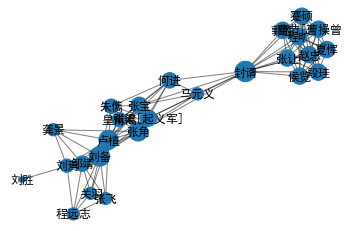

In [156]:
# 挑选主要人物画图
important_nodes = [node for node in G.nodes if G.degree[node]>=5]
G_sub = G.subgraph(important_nodes).copy()
draw_graph(G_sub,alpha=0.5,node_scale=30,figsize=(6,4))

合并子图并显示

In [158]:
G_chapters = []
for chapter in chapters:
    sentences = ht.cut_sentences(chapter)     # 分句
    docs = [sentences[i]+sentences[i+1] for i in range(len(sentences)-1)]
    G_chapters.append(ht.build_entity_graph(docs, used_types=["人名"]))
# 合并各张子图
G_global = nx.Graph()
for G0 in G_chapters:
    for (u,v) in G0.edges:
        if G_global.has_edge(u,v):
            G_global[u][v]["weight"] += G0[u][v]["weight"]
        else:
            G_global.add_edge(u,v,weight=G0[u][v]["weight"])
# 忽略游离的小分支只取最大连通分量
largest_comp = max(nx.connected_components(G_global), key=len)
G_global = G_global.subgraph(largest_comp).copy()
print(nx.info(G_global))
important_nodes = [node for node in G_global.nodes if G_global.degree[node]>=30]
G_main = G_global.subgraph(important_nodes).copy()

Name: 
Type: Graph
Number of nodes: 1271
Number of edges: 10062
Average degree:  15.8332


In [161]:
import pyecharts
help(pyecharts)

Help on package pyecharts:

NAME
    pyecharts

PACKAGE CONTENTS
    _version
    charts (package)
    commons (package)
    components (package)
    datasets (package)
    exceptions
    faker
    globals
    options (package)
    render (package)
    scaffold (package)
    types

VERSION
    1.8.1

AUTHOR
    chenjiandongx

FILE
    c:\users\test\.conda\envs\dataanalysis\lib\site-packages\pyecharts\__init__.py




In [162]:
from pyecharts import Graph

ImportError: cannot import name 'Graph'

In [163]:
nodes = [{"name": "结点1", "value":0, "symbolSize": 10} for i in range(G_main.number_of_nodes())]
for i,name0 in enumerate(G_main.nodes):
    nodes[i]["name"] = name0
    nodes[i]["value"] = G_main.degree[name0]
    nodes[i]["symbolSize"] = G_main.degree[name0] / 10.0
links = [{"source": "", "target": ""} for i in range(G_main.number_of_edges())]
for i,(u,v) in enumerate(G_main.edges):
    links[i]["source"] = u
    links[i]["target"] = v
    links[i]["value"] = G_main[u][v]["weight"]

In [164]:
graph = pyecharts.Graph("三国人物关系力导引图")
graph.add("", nodes, links)
# graph.render("./images/三国人物关系力导引图.html")
graph

AttributeError: module 'pyecharts' has no attribute 'Graph'

### 5.3 存储网络数据

## 6. 网络分析

In [166]:
import pandas as pd

### 6.1 中心度分析

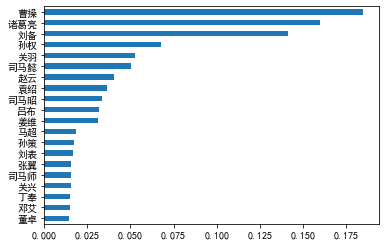

In [168]:
between = pd.Series(nx.betweenness_centrality(G_global)).sort_values()
between.tail(20).plot(kind="barh")
plt.show()

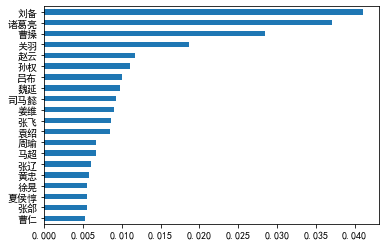

In [167]:
page_ranks = pd.Series(nx.algorithms.pagerank(G_global)).sort_values()
page_ranks.tail(20).plot(kind="barh")
plt.show()

### 6.2 社群发现

In [174]:
import community   
from collections import defaultdict

In [170]:
def draw_community(comm):
    G_comm = G_main.subgraph(comm_dict[comm]).copy()
    draw_graph(G_comm,alpha=0.2,node_scale=10,figsize=(8,6))
    print("community {}: {}".format(str(comm)," ".join(reversed(sorted(comm_dict[comm],key=G_global.degree)))))

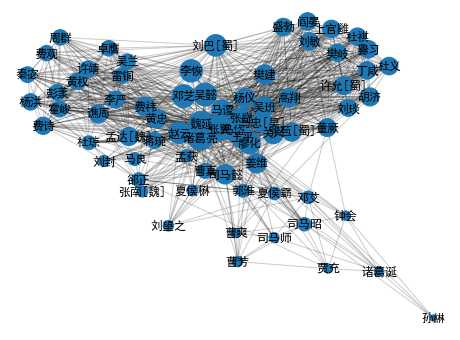

community 2: 诸葛亮 赵云 司马懿 魏延 姜维 张翼 马岱 廖化 黄忠 司马昭 吴懿 关兴 吴班 王平 邓芝 孟达[魏] 张苞[蜀] 邓艾 费祎 马忠[吴] 马谡 谯周 曹真 李恢 黄权 钟会 蒋琬 刘巴[蜀] 司马师 张嶷 杨洪 许靖 费诗 刘封 郭淮 孟获 李严 秦宓 樊建 马良 杨仪 夏侯霸 张南[魏] 高翔 诸葛诞 郤正 曹爽 许允[蜀] 杜琼 孙綝 董厥 霍峻 胡济 贾充 彭羕 吴兰 雷铜 卓膺 夏侯楙 樊岐 爨习 阎晏 杜义 盛勃 刘敏 刘琰 上官雝 费观 杜祺 丁咸 曹芳 刘望之 周群


In [175]:
partition = community.best_partition(G_main)         # Louvain算法划分社区
comm_dict = defaultdict(list)
for person in partition:
    comm_dict[partition[person]].append(person)
draw_community(2)

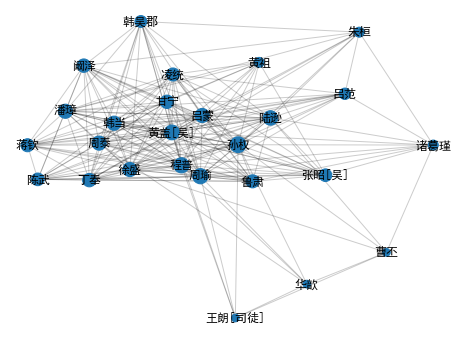

community 0: 孙权 陆逊 周瑜 吕蒙 丁奉 周泰 曹丕 程普 韩当 徐盛 张昭[吴] 黄盖[吴] 潘璋 甘宁 鲁肃 华歆 王朗[司徒] 凌统 韩吴郡 诸葛瑾 蒋钦 黄祖 阚泽 朱桓 吕范 陈武


In [177]:
draw_community(0)

### 随时间变化

In [ ]:
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
width, step = 10,5
range0 = range(0,len(G_chapters)-width+1,step)
numFrame, fps = len(range0), 1
duration = numFrame/fps
pos_global = nx.spring_layout(G_main)

def make_frame_mpl(t):
    i = step*int(t*fps)
    G_part = nx.Graph()
    for G0 in G_chapters[i:i+width]:
        for (u,v) in G0.edges:
            if G_part.has_edge(u,v):
                G_part[u][v]["weight"] += G0[u][v]["weight"]
            else:
                G_part.add_edge(u,v,weight=G0[u][v]["weight"])
    largest_comp = max(nx.connected_components(G_part), key=len)
    used_nodes = set(largest_comp) & set(G_main.nodes)
    G = G_part.subgraph(used_nodes)
    fig = plt.figure(figsize=(12,8),dpi=100)
    nx.draw_networkx_nodes(G,pos_global,node_size=[G.degree[x]*10 for x in G.nodes])
#     nx.draw_networkx_edges(G,pos_global)
    nx.draw_networkx_labels(G,pos_global)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.axis("off")
    plt.title(f"第{i+1}到第{i+width+1}章的社交网络")
    return mplfig_to_npimage(fig)
animation = mpy.VideoClip(make_frame_mpl, duration=duration)
animation.write_gif("./images/三国社交网络变化.gif", fps=fps)

## 7. 语料分析
### 7.1 情感分析

In [ ]:
#实体识别.ipynb
# 使用默认的内置资源建立情感词典，最负面为-1，最正面为+1
senti_dict = ht.build_sent_dict(processed_texts, scale="+-1")
# 假设实体出现的句子的情感都是体现了对其的情感，所有句子的情感的平均值代表了总体好评度
for entity in ht.entity_type_dict:
    entity_appeared_docs = ht.search_entity(entity, processed_texts, inv_index)
    docs_senti = [ht.analyse_sent(doc) for doc in entity_appeared_docs]
    avg_senti = sum(docs_senti) / len(docs_senti)
    print(f"{entity}的好评度为：{avg_senti}")